problem1、2：计算分组人数
* 样本来源：武汉疫情，文献参考He, Zhenyu, et al. "Seroprevalence and humoral immune durability of anti-SARS-CoV-2 antibodies in Wuhan, China: a longitudinal, population-level, cross-sectional study." The Lancet 397.10279 (2021): 1075-1084.
  * 感染率：6.9%
  * 核酸检测信息：采集样本数量：将武汉总人口1244.8万人分为10个片区，5轮进行，则每轮采样样本数为248960，假设为250000
* 包括的参数：
  * 采样总数：Samples_total
  * 感染率：infection_rate
  * 混检组内人数：x

* 计算原理：
  * type1：不考虑检测间的区别，直接计算检测次数的期望来代表，并检验其合理性
    * 注：假设样本足够大，不整除且存在阳性情况下，将剩余人数直接按分组人数计算
    * 结论，在分组人数在区间10至30间拟合程度较好，符合先验知识：每组人数一般设定为10-20人 

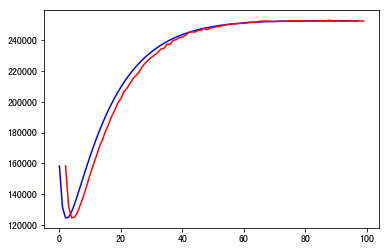

In [161]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Samples_total=250000
infection_rate=0.069

# 计算检测次数期望
def count_exception(Samples_total,infection_rate,x):         
    f = -(-Samples_total//x) * (1*(1-infection_rate)**x+(x+1)*(1-(1-infection_rate)**x))      # 组数向上取整
    return f

#产生分组人数为range(2,100)区间的公式化期望函数
factors1=[factor for factor in range(2,100)]
x=np.array(factors1)

# 作图表示检测次数期望的变化
f1=count_exception(Samples_total, infection_rate, x)
plt.plot(f1, 'b')

# 权重随机数
def weighted_random(weights):                 
    number = random.random()*sum(weights.values())
    for x, p in weights.items():
        if number < p:
            break
    return x

# 根据权重产生样本
def creat_samples(num,weights):             
    samples = []
    for i in range(num):
        samples.append(weighted_random(weights))
    return samples

weights={1:infection_rate,0:1-infection_rate}

#产生分组人数为range(2,100)区间的随机产生样本曲线
samples=creat_samples(Samples_total, weights)

def sum_test(samples,fi):         #fi为factors中的一个元素numEachGroup，即分组人数
    numGroup = Samples_total // fi  
    sumTest=0
    # 分别为存在阳性与否对应的检测次数
    minTest=1
    maxTest=fi+1
    
    for group in range(numGroup):
        startPos=group * fi
        endPos=startPos+fi
        eachGroupSample=samples[startPos:endPos]
        
        # 判断组内是否有阳性
        if 1 in eachGroupSample:
            sumTest+=maxTest
        else:
            sumTest+=minTest

    # 非整除情况
    if Samples_total % fi:
        m = Samples_total%fi
        eachGroupSample=samples[len(samples)-m:len(samples)]
        if 1 in eachGroupSample:
            sumTest+=Samples_total%fi+1
        else:
            sumTest+=minTest      
                  
    return sumTest

sumTest=[]

# 输出
for i in factors1:
    sumTest.append(sum_test(samples, i))
plt.plot(factors1, sumTest,'r')
plt.savefig('ep1_1.pdf')
plt.show()

count_per_group = []
total_exception = []
for i in range(0,29):
    count_per_group.append(factors1[i])
    total_exception.append(f1[i])

# 绘制表格
data = {
    "count_per_group":count_per_group,
    "count_exception":total_exception
}


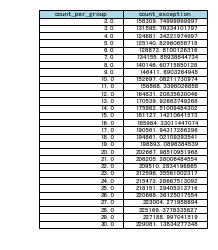

In [162]:
count_per_group = []
total_exception = []
for i in range(0,29):
    count_per_group.append(factors1[i])
    total_exception.append(f1[i])

# 绘制表格
data = {
    "count_per_group":count_per_group,
    "count_exception":total_exception
}

df = pd.DataFrame(data)
fig,ax = plt.subplots(figsize=(3, 4))
ax.axis("off")
ax.axis("tight")
tb = ax.table(cellText=df.values, colLabels=df.columns, bbox=[0, 0, 1, 1], )
tb[0, 0].set_facecolor("lightblue")
tb[0, 1].set_facecolor("lightblue")
tb[0, 0].set_text_props(color="black")
tb[0, 1].set_text_props(color="black")

plt.savefig('ep1_2.pdf')
plt.show()

确定混检有效的感染率区间
* 参数定义：工作率rate：实际检测次数与总样本数之比
* 先验知识：前序初步判断的表格，用于选取合适的组内人数区间，由于感染率未知的限制，需要对感染率不同情况下进行讨论

[2, 4, 5, 8, 10, 16, 20, 25, 40, 50, 80]
[0.502112, 0.254224, 0.20528, 0.133384, 0.11052, 0.079268, 0.07096, 0.0661, 0.0666, 0.0716, 0.09474]
[2, 4, 5, 8, 10, 16, 20, 25, 40, 50, 80]
[0.519856, 0.289408, 0.24898, 0.202376, 0.19512, 0.209636, 0.23032, 0.2609, 0.35428, 0.4102, 0.56386]
[2, 4, 5, 8, 10, 16, 20, 25, 40, 50, 80]
[0.598176, 0.43696, 0.4285, 0.464712, 0.50432, 0.627108, 0.69728, 0.7661, 0.89988, 0.9422, 0.99874]
[2, 4, 5, 8, 10, 16, 20, 25, 40, 50, 80]
[0.691184, 0.595824, 0.61252, 0.694824, 0.75228, 0.877476, 0.92672, 0.9697, 1.01172, 1.0146, 1.0125]
[2, 4, 5, 8, 10, 16, 20, 25, 40, 50, 80]
[0.861816, 0.842448, 0.87644, 0.95956, 0.99856, 1.035748, 1.03928, 1.0376, 1.02484, 1.02, 1.0125]
[2, 4, 5, 8, 10, 16, 20, 25, 40, 50, 80]
[1.250016, 1.18672, 1.16854, 1.120296, 1.09912, 1.0625, 1.05, 1.04, 1.025, 1.02, 1.0125]


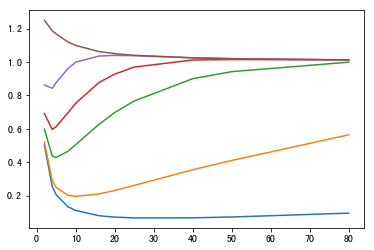

In [163]:
mobidity_list=[0.001,0.01,0.05,0.1,0.2,0.5]
sumSamples=250000

for mobidity in mobidity_list:
    saveRate_list=[]
    save_rate=0
    weights={1:mobidity,0:1-mobidity}
    samples=creat_samples(sumSamples, weights)
    factors=[i for i in range(2,max_numGroup(sumSamples, mobidity, rate)) if not sumSamples%i]
    print(factors)
    for fi in factors:        
        sumTest=sum_test(samples,fi)
        save_rate=sumTest/sumSamples
        saveRate_list.append(save_rate)

    print(saveRate_list)
    plt.plot(factors,saveRate_list)

plt.savefig('ep1_3.pdf')
plt.show()